<a href="https://colab.research.google.com/github/bakeunbi99/Colab/blob/main/Ch3.%EB%94%A5%EB%9F%AC%EB%8B%9D/6_%EB%94%A5%EB%9F%AC%EB%8B%9D_CNN_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""
날짜 : 2021-10-27 15:52
내용 : 딥러닝 CNN 실습하기 

CNN 구성요소
  - 컨볼루션층은 합성곱 연산을 수행해서 이미지의 특징을 추출하는 역할
  - 풀링층은 합성곱 연산을 수행 후 차원을 축소하는 연산을 수행
"""

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets.cifar10 import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import mse
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from PIL import Image

In [2]:
# 데이터 불러오기
(cifar_train_data, cifar_train_label), (cifar_test_data, cifar_test_label) = load_data()
cifar_train_data.shape # 50000장, 32x32, 3채널

170508288/170498071 [==============================] - 7s 0us/step


(50000, 32, 32, 3)

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


<function matplotlib.pyplot.show>

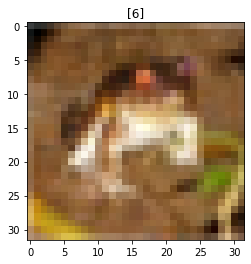

In [3]:
# 데이터 확인
plt.title(cifar_train_label[0])
plt.imshow(cifar_train_data[0])
plt.show

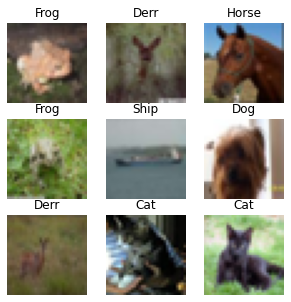

In [4]:
# 데이터 샘플 확인
label_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Derr', 'Dog', 'Frog', 'Horse', 'Ship']
random_idx = np.random.randint(50000, size=9) # 50000장 중 9개 출력

plt.figure(figsize=(5, 5)) # 출력 사이즈(5 x 5)


for i, idx in enumerate(random_idx):
  plt.subplot(3, 3, i+1)
  label = cifar_train_label[idx][0]
  plt.imshow(cifar_train_data[idx, :])
  plt.title(label_names[label])
  plt.axis('off')


In [5]:
# 학습 데이터, 라벨(원-핫 인코딩)
cifar_train_data = cifar_train_data / 255
cifar_test_data = cifar_test_data / 255

cifar_train_label = to_categorical(cifar_train_label)
cifar_test_label = to_categorical(cifar_test_label)

In [6]:
# 학습모델
model = Sequential()

# CNN 층
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))
model.add(Dropout(0.2))

# FCNN층(일반 딥러닝 입력층, 은닉층, 출력층)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [7]:
# 모델 설정
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['acc'])

In [8]:
# 학습하기
model.fit(cifar_train_data, cifar_train_label, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 42s 8ms/step - loss: 1.3233 - acc: 0.5267
Epoch 2/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9487 - acc: 0.6670
Epoch 3/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7636 - acc: 0.7327
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.6117 - acc: 0.7843
Epoch 5/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.4698 - acc: 0.8340
Epoch 6/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.3528 - acc: 0.8752
Epoch 7/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.2675 - acc: 0.9042
Epoch 8/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.2042 - acc: 0.9293
Epoch 9/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.1706 - acc: 0.9400
Epoch 10/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.1431 - acc: 0.9495
